In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dataset

In [ ]:
ds = r"/content/drive/MyDrive/Merged Dataset/Merged Dataset"

In [ ]:
Test_path=os.path.sep.join([ds, "Test"])
Train_path=os.path.sep.join([ds, "Train"])
Val_path=os.path.sep.join([ds, "Val"])

In [ ]:
totalTest = len(list(paths.list_images(Test_path)))
totalTest

60

In [ ]:
totalTrain = len(list(paths.list_images(Train_path)))
totalTrain

2992

In [ ]:
totalVal = len(list(paths.list_images(Val_path)))
totalVal

748

# Data Augmentation

In [ ]:
ds_aug = ImageDataGenerator(horizontal_flip=True,
                            rescale=1 / 255.0,
                            rotation_range=20,
                            zoom_range=0.25,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            fill_mode="nearest")
ds_aug2 = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
training_data = ds_aug.flow_from_directory(Train_path,
                                            target_size=(64,64),
                                            batch_size=10,
                                            class_mode='binary',
                                            color_mode="rgb",
                                            shuffle=False)

val_data = ds_aug2.flow_from_directory(Val_path,
                                        target_size=(64,64),
                                        batch_size=10,
                                        class_mode='binary',
                                        color_mode="rgb",
                                        shuffle=False)

Found 2992 images belonging to 2 classes.
Found 748 images belonging to 2 classes.


# Model Training

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Reshape

In [ ]:
l1 = Conv2D(16,(3,3),input_shape=(64,64,3))
l2 = MaxPooling2D(pool_size=(2,2))
l3 = Dense(32, activation='relu')

l4 = Conv2D(32,(3,3))
l5 = MaxPooling2D(pool_size=(2,2))
l6 = Dense(64, activation='relu')

l7 = Reshape((14*14,64),)

l8 = LSTM(64, input_shape = (64, 64))
l9 = Dense(32, activation='sigmoid')
l10 = Dense(1, activation='softplus')

In [ ]:
model = Sequential([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 31, 31, 32)        544       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dense_1 (Dense)             (None, 14, 14, 64)        2

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
           optimizer='adam',
           metrics=["accuracy"])

In [ ]:
history = model.fit(training_data,
                    steps_per_epoch=80,
                    epochs=135,
                    validation_data=val_data,
                    shuffle=True)

Epoch 1/135
80/80 [==============================] - 709s 9s/step - loss: 0.6987 - accuracy: 0.5487 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 2/135
80/80 [==============================] - 186s 2s/step - loss: 0.6924 - accuracy: 0.5581 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/135
80/80 [==============================] - 142s 2s/step - loss: 0.6950 - accuracy: 0.5412 - val_loss: 0.6937 - val_accuracy: 0.5067
Epoch 4/135
80/80 [==============================] - 98s 1s/step - loss: 0.7286 - accuracy: 0.5362 - val_loss: 0.6924 - val_accuracy: 0.5254
Epoch 5/135
80/80 [==============================] - 85s 1s/step - loss: 0.6957 - accuracy: 0.5362 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 6/135
80/80 [==============================] - 46s 584ms/step - loss: 0.7016 - accuracy: 0.5076 - val_loss: 0.6892 - val_accuracy: 0.4706
Epoch 7/135
80/80 [==============================] - 54s 677ms/step - loss: 0.6995 - accuracy: 0.4975 - val_loss: 0.6862 - val_accuracy: 0.4933
Epoc

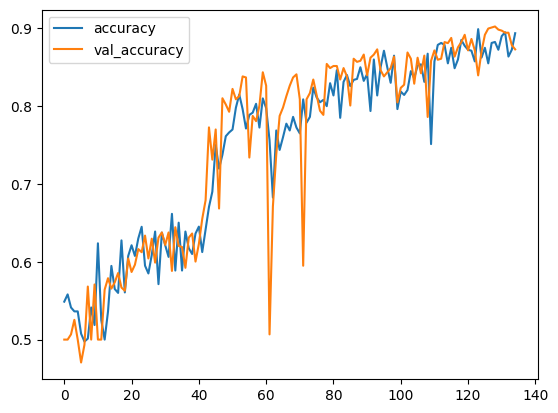

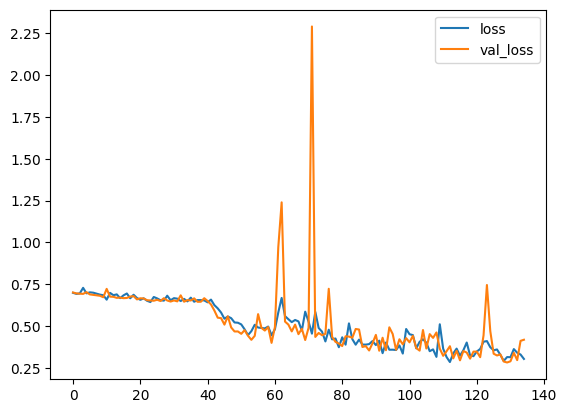

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

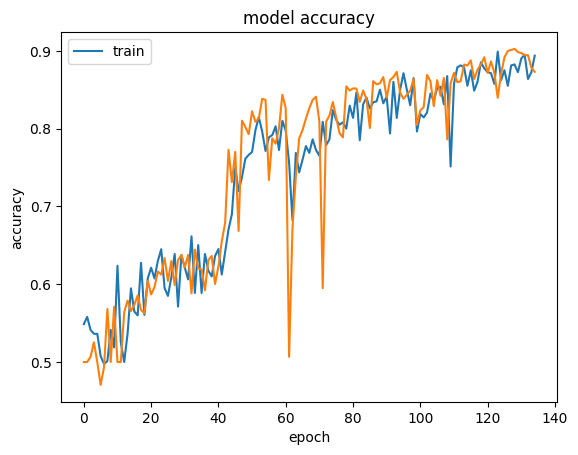

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train',], loc='upper left')
plt.show()

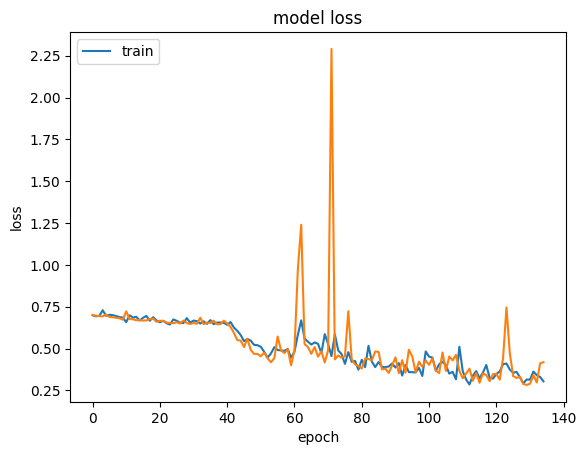

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# model.save('CNN_RNN_2.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image

testImgPath = os.path.sep.join([ds, "Test"])
test_image = image.load_img(rf'{testImgPath}/cataract (81).jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(result)
if result[0][0] >= 0.5:
    p = 'normal'
else:
    p = 'cataract'
print(p)

1/1 [==============================] - 0s 35ms/step
[[0.05798893]]
cataract
